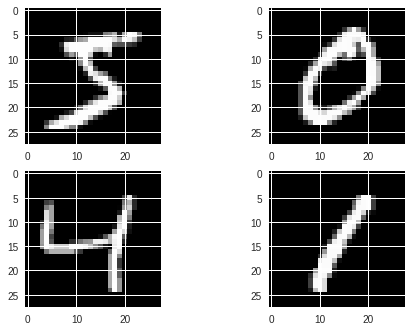

In [19]:

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()



In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [27]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2810 - acc: 0.9206 - val_loss: 0.1416 - val_acc: 0.9566
Epoch 2/10
 - 6s - loss: 0.1116 - acc: 0.9678 - val_loss: 0.0912 - val_acc: 0.9710
Epoch 3/10
 - 6s - loss: 0.0715 - acc: 0.9796 - val_loss: 0.0777 - val_acc: 0.9780
Epoch 4/10
 - 6s - loss: 0.0504 - acc: 0.9858 - val_loss: 0.0744 - val_acc: 0.9769
Epoch 5/10
 - 6s - loss: 0.0371 - acc: 0.9892 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 6/10
 - 6s - loss: 0.0267 - acc: 0.9929 - val_loss: 0.0617 - val_acc: 0.9810
Epoch 7/10
 - 6s - loss: 0.0204 - acc: 0.9948 - val_loss: 0.0621 - val_acc: 0.9810
Epoch 8/10
 - 6s - loss: 0.0139 - acc: 0.9971 - val_loss: 0.0618 - val_acc: 0.9805
Epoch 9/10
 - 6s - loss: 0.0107 - acc: 0.9978 - val_loss: 0.0575 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0591 - val_acc: 0.9812

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [37]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 58s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
 - 58s - loss: 0.2253 - acc: 0.9356 - val_loss: 0.0774 - val_acc: 0.9759
Epoch 2/10
Epoch 2/10
 - 58s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9851
 - 58s - loss: 0.0709 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9851
Epoch 3/10
Epoch 3/10
 - 58s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0432 - val_acc: 0.9852
 - 58s - loss: 0.0506 - acc: 0.9846 - val_loss: 0.0432 - val_acc: 0.9852
Epoch 4/10
Epoch 4/10
 - 58s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0404 - val_acc: 0.9874
 - 58s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 5/10
Epoch 5/10
 - 59s - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0343 - val_acc: 0.9887
 - 59s - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0343 - val_acc: 0.9887
Epoch 6/10
Epoch 6/10
 - 59s - loss: 0.0264 - acc: 0.9919 - 